In [ ]:
# Economic.xlsx is the local file i created by tranposing the US economy data given in economic.xlsx file
# in this code I examined the relations between diff FED indicators and further with plotly curves, shown how indicator value chnages during recseion

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#load dataset
df=pd.read_excel('/content/economic.xlsx')
num_non_data = df.eq('-').sum().sum()
df.fillna(method='ffill')
df

,TIMESTAMP,Retail Sales Ex-Autos MM,Retail Sales MM,Building Permits: Number,Consumer Confidence,ISM Manufacturing PMI,ISM N-Mfg PMI,Core PCE MM,Core PCE YY,PCE MM,...,"CPI YY, NSA",Unemployment Rate,Average Earnings MM,Average Earnings YY,Average Workweek Hrs,Non-Farm Payrolls,Fed Rate Lower bound,Fed Rate Upper bound,Indicators,GDP Final
0,2023-05-31,NaN,NaN,NaN,102.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.25,2023-03-31,NaN
1,2023-04-30,0.4,0.4,1416000.0,103.7,47.1,51.9,0.4,4.7,0.4,...,4.9,3.4,0.5,4.4,34.4,253000.0,4.75,5.00,2022-12-31,2.6
2,2023-03-31,-0.5,-0.7,1413000.0,104.0,46.3,51.2,0.3,4.6,0.1,...,5.0,3.5,0.3,4.3,34.4,165000.0,4.75,5.00,2022-09-30,3.2
3,2023-02-28,-0.5,-0.7,1524000.0,103.4,47.7,55.1,0.4,4.7,0.3,...,6.0,3.6,0.3,4.7,34.5,248000.0,4.50,4.75,2022-06-30,-0.6
4,2023-01-31,1.9,2.8,1339000.0,106.0,47.4,55.2,0.6,4.7,0.6,...,6.4,3.4,0.3,4.4,34.6,472000.0,4.25,4.50,2022-03-31,-1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1981-03-31,NaN,NaN,NaN,77.8,49.6,NaN,0.6,9.1,0.7,...,10.5,7.4,NaN,NaN,NaN,105000.0,NaN,NaN,NaT,NaN
507,1981-02-28,NaN,NaN,NaN,69.0,48.8,NaN,0.7,9.5,1.0,...,11.4,7.4,NaN,NaN,NaN,72000.0,NaN,NaN,NaT,NaN
508,1981-01-31,NaN,NaN,NaN,74.4,49.2,NaN,0.9,9.8,1.0,...,11.8,7.5,NaN,NaN,NaN,90000.0,NaN,NaN,NaT,NaN
509,1980-12-31,NaN,NaN,NaN,78.6,53.0,NaN,0.6,9.6,0.6,...,12.5,7.2,NaN,NaN,NaN,196000.0,NaN,NaN,NaT,NaN


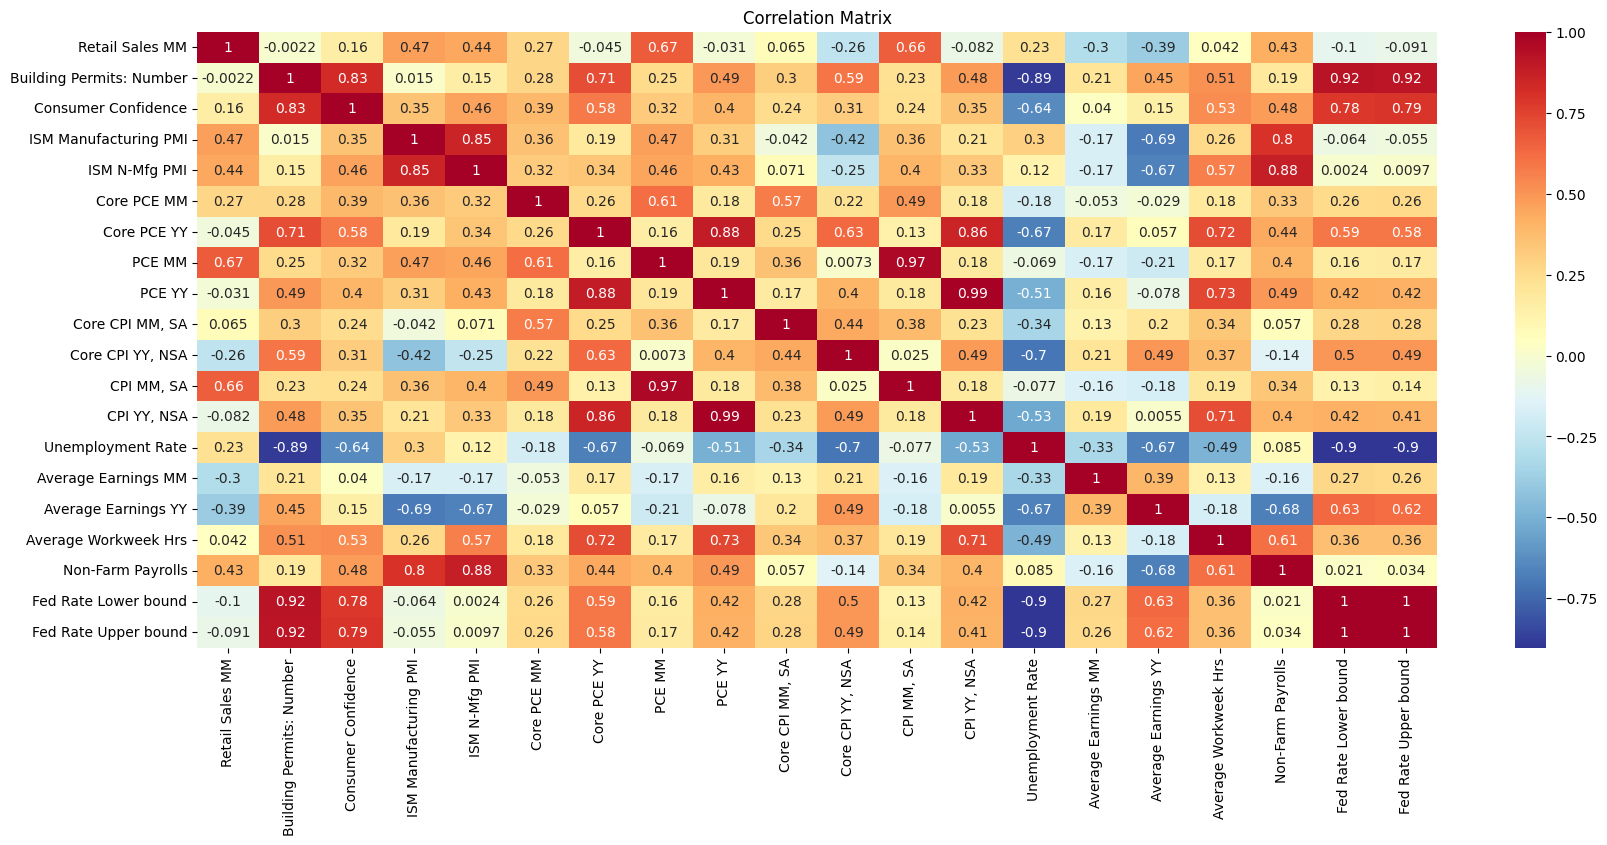

In [6]:
#comarision of relations of indicator between two dates
start_date=pd.to_datetime('2007-05-31')
end_date=pd.to_datetime('2012-11-30')
y=(df['TIMESTAMP']-start_date).abs().idxmin()+1
x=(df['TIMESTAMP']-end_date).abs().idxmin()+1
corr_mat=df.iloc[x:y,2:22].corr()
corr_mat
plt.figure(figsize=(20, 8))  # Adjust the figure size as per your preference
sns.heatmap(corr_mat, annot=True, cmap='RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# this code snippets gives list of economic indicators having higher than 0.5 relaationships with fed rate in vry 22 months froom 1994-2023
last_date=df.shape[0]-1
month_window=22
for i in range (1,last_date-month_window,month_window):
  corr_mat=df.iloc[i:i+month_window,2:21].corr()
  last_row = corr_mat.iloc[-1,:-1]
  corr_index=last_row[((last_row>0.5) | (last_row<-0.5))]
  cor=corr_index.to_dict()
  print({(df.iloc[i,0].strftime("%Y-%m-%d"),"to",df.iloc[i+month_window,0].strftime("%Y-%m-%d")):cor})

{('2023-04-30', 'to', '2021-06-30'): {'Building Permits: Number': -0.8534117665410135, 'Consumer Confidence': -0.525537102669912, 'ISM Manufacturing PMI': -0.9754040764029034, 'ISM N-Mfg PMI': -0.8115942080458834, 'CPI MM, SA': -0.5416125554782654, 'Unemployment Rate': -0.6174163121264987, 'Average Earnings YY': -0.5154949230906425, 'Average Workweek Hrs': -0.8429495157949629, 'Non-Farm Payrolls': -0.6764163711851874}}
{('2021-06-30', 'to', '2019-08-31'): {'Consumer Confidence': 0.7356261926839448, 'ISM Manufacturing PMI': -0.5340522729738191, 'Unemployment Rate': -0.6591100234994081, 'Average Workweek Hrs': -0.6888693021141932}}
{('2019-08-31', 'to', '2017-10-31'): {'ISM Manufacturing PMI': -0.6695783240100155, 'PCE YY': -0.5274087089387559, 'Core CPI YY, NSA': 0.553864030327123, 'CPI YY, NSA': -0.5090841648741969, 'Unemployment Rate': -0.768590519001768, 'Average Earnings YY': 0.8959585520149841}}
{('2017-10-31', 'to', '2015-12-31'): {'Building Permits: Number': 0.6612210672484254, '

In [8]:
#visualizing the percentage changes in indicator value between two dates
import plotly.graph_objects as go
indicators_to_drop=['Retail Sales Ex-Autos MM','Core PCE YY','Core PCE MM','PCE YY','Core CPI MM, SA','Core CPI YY, NSA','CPI YY, NSA','Average Earnings MM','Average Workweek Hrs','Fed Rate Upper bound']
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
start_date = pd.to_datetime('2008-06-01')
end_date = pd.to_datetime('2020-06-30')
recession_data = df[(df['TIMESTAMP'] >= start_date) & (df['TIMESTAMP'] <= end_date)]
#print(recession_data.iloc[:,1:])
recession_data.set_index('TIMESTAMP')
recession_averages = recession_data.iloc[:,1:22].pct_change(-1)*100
fig = go.Figure()
for column in recession_averages.columns:
    if column not in indicators_to_drop:
     fig.add_trace(go.Scatter(x=recession_data['TIMESTAMP'], y=recession_averages[column], name=column))

fig.update_layout(
    title="Average Value of Economic Indicators during  ({}) to ({})".format(start_date,end_date),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Average Value'),
    width=1200,
    height=800,
    )

fig.show()


In [9]:
#leading indicators percentage value from prceding month before recession started
import plotly.graph_objects as go
leading_indicator=['Building Permits: Number','Consumer Confidence','ISM Manufacturing PMI','ISM N-Mfg PMI']
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
start_date = pd.to_datetime('2007-07-01')
end_date = pd.to_datetime('2009-02-28')
recession_data = df[(df['TIMESTAMP'] >= start_date) & (df['TIMESTAMP'] <= end_date)]
recession_data.set_index('TIMESTAMP')
recession_averages = recession_data.iloc[:,1:22].pct_change(-1)*100
fig = go.Figure()
for column in recession_averages.columns:
    if column in leading_indicator:
     fig.add_trace(go.Scatter(x=recession_data['TIMESTAMP'], y=recession_averages[column], name=column))

fig.update_layout(
    title="Average Value of Economic Indicators during  ({}) to ({})".format(start_date,end_date),
    xaxis=dict(title='Date'),
    yaxis=dict(title='percetage change progressively'),
    width=1200,
    height=800,
    )

fig.show()


In [ ]:
#coincidinting indicator during recession
import plotly.graph_objects as go
indicator=['Retail Sales MM','Core PCE MM','PCE MM','Unemployment Rate','Average Earnings MM','Average Workweek MM']
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
start_date = pd.to_datetime('2007-12-01')
end_date = pd.to_datetime('2010-02-28')
recession_data = df[(df['TIMESTAMP'] >= start_date) & (df['TIMESTAMP'] <= end_date)]
#print(recession_data.iloc[:,1:])
recession_data.set_index('TIMESTAMP')
recession_averages = recession_data.iloc[:,1:22].pct_change(-1)*100
fig = go.Figure()
for column in recession_averages.columns:
    if column in indicator:
     fig.add_trace(go.Scatter(x=recession_data['TIMESTAMP'], y=recession_averages[column], name=column))

fig.update_layout(
    title="Average Value of Economic Indicators during  ({}) to ({})".format(start_date,end_date),
    xaxis=dict(title='Date'),
    yaxis=dict(title='percetage change progressively'),
    width=1200,
    height=800,
    )

fig.show()
